# Explore kaggle data and combine to a single dataset

Run the following notebook to build a combined dataset that will be used for training

In [ ]:
# imports
import pandas as pd

In [36]:
df1 = pd.read_csv("data/data_scientist_united_states_job_postings_jobspikr.csv")
df2 = pd.read_csv("data/Uncleaned_DS_jobs.csv")
df3 = pd.read_csv("data/DataScientist.csv")

In [54]:
df1["job_board"].unique()

array(['indeed', 'dice', 'monster', 'careerbuilder', 'totaljob', nan,
       'simplyhired', 'Stackoverflow'], dtype=object)

In [37]:
print(df1.head())
print(df1.shape)


             crawl_timestamp  \
0  2019-02-06 05:26:22 +0000   
1  2019-02-06 05:33:41 +0000   
2  2019-02-06 05:33:35 +0000   
3  2019-02-06 05:33:42 +0000   
4  2019-02-06 05:48:23 +0000   

                                                 url  \
0  https://www.indeed.com/viewjob?jk=fd83355c2b23...   
1  https://www.dice.com/jobs/detail/Data-Scientis...   
2  https://www.dice.com/jobs/detail/Data-Scientis...   
3  https://www.indeed.com/viewjob?jk=841edd86ead2...   
4  https://job-openings.monster.com/senior-data-s...   

                                           job_title            category  \
0                        Enterprise Data Scientist I  Accounting/Finance   
1                                     Data Scientist                 NaN   
2                                     Data Scientist                 NaN   
3  Data Scientist, Aladdin Wealth Tech, Associate...  Accounting/Finance   
4                              Senior Data Scientist             biotech   

             

In [38]:
print(df2.head())
print(df2.shape)

   index          Job Title               Salary Estimate  \
0      0  Sr Data Scientist  $137K-$171K (Glassdoor est.)   
1      1     Data Scientist  $137K-$171K (Glassdoor est.)   
2      2     Data Scientist  $137K-$171K (Glassdoor est.)   
3      3     Data Scientist  $137K-$171K (Glassdoor est.)   
4      4     Data Scientist  $137K-$171K (Glassdoor est.)   

                                     Job Description  Rating  \
0  Description\n\nThe Senior Data Scientist is re...     3.1   
1  Secure our Nation, Ignite your Future\n\nJoin ...     4.2   
2  Overview\n\n\nAnalysis Group is one of the lar...     3.8   
3  JOB DESCRIPTION:\n\nDo you have a passion for ...     3.5   
4  Data Scientist\nAffinity Solutions / Marketing...     2.9   

              Company Name       Location            Headquarters  \
0         Healthfirst\n3.1   New York, NY            New York, NY   
1             ManTech\n4.2  Chantilly, VA             Herndon, VA   
2      Analysis Group\n3.8     Boston, MA

In [39]:
print(df3.head())
print(df3.shape)

   Unnamed: 0  index                          Job Title  \
0           0      0              Senior Data Scientist   
1           1      1  Data Scientist, Product Analytics   
2           2      2               Data Science Manager   
3           3      3                       Data Analyst   
4           4      4             Director, Data Science   

                Salary Estimate  \
0  $111K-$181K (Glassdoor est.)   
1  $111K-$181K (Glassdoor est.)   
2  $111K-$181K (Glassdoor est.)   
3  $111K-$181K (Glassdoor est.)   
4  $111K-$181K (Glassdoor est.)   

                                     Job Description  Rating  \
0  ABOUT HOPPER\n\nAt Hopper, we’re on a mission ...     3.5   
1  At Noom, we use scientifically proven methods ...     4.5   
2  Decode_M\n\nhttps://www.decode-m.com/\n\nData ...    -1.0   
3  Sapphire Digital seeks a dynamic and driven mi...     3.4   
4  Director, Data Science - (200537)\nDescription...     3.4   

                      Company Name       Location

Looking at the shape of each of the data sources, we expect the total number of job posts in the combined dataset to be close to 14581.

In [21]:
# Shows total number of missing values for each column
print(df1.isna().sum())
print(df2.isna().sum())
print(df3.isna().sum())

crawl_timestamp             0
url                         0
job_title                   0
category                  882
company_name                1
city                      249
state                     416
country                     0
inferred_city            1020
inferred_state            516
inferred_country          495
post_date                   0
job_description             0
job_type                    0
salary_offered           9403
job_board                 690
geo                       700
cursor                      0
contact_email           10000
contact_phone_number     9584
uniq_id                     0
html_job_description     8401
dtype: int64
index                0
Job Title            0
Salary Estimate      0
Job Description      0
Rating               0
Company Name         0
Location             0
Headquarters         0
Size                 0
Founded              0
Type of ownership    0
Industry             0
Sector               0
Revenue              0
Compe

Looking at the head of the data we see quite a few missing values. We see that in df1, 9 columns contain many missing values. However, this is ok because the columns we are interested in are mainly job_title, company name, and job description. These columns contain almost no missing values which is good.

In [55]:
# Drop the 1 row where company name is missing
df1 = df1.dropna(subset=["company_name"])
df1 = df1.fillna("Unknown")
print(df1.shape)

(9999, 22)


Now lets clean up the company name column for df2 and df3, since it looks as if the rating is attached to the end of the company name.

In [56]:
# clean up the company name by removing the rating attached to the end
df2["Company Name"] = df2["Company Name"].apply(lambda x: x.split('\n')[0])
df3["Company Name"] = df3["Company Name"].apply(lambda x: x.split('\n')[0])

print(df2["Company Name"])
print(df3["Company Name"])

0               Healthfirst
1                   ManTech
2            Analysis Group
3                   INFICON
4        Affinity Solutions
               ...         
667                TRANZACT
668                    JKGT
669              AccessHope
670    ChaTeck Incorporated
671           1-800-Flowers
Name: Company Name, Length: 672, dtype: object
0                                 Hopper
1                                Noom US
2                               Decode_M
3                       Sapphire Digital
4             United Entertainment Group
                      ...               
3904                Tachyon Technologies
3905    Staffigo Technical Services, LLC
3906                      PDS Tech, Inc.
3907          Data Resource Technologies
3908                                 UCB
Name: Company Name, Length: 3909, dtype: object


Now we can combine the 3 data sources by job title, company name, job description

In [57]:
# select only the columns we want
subset1 = df1[["job_title","company_name","job_description","job_board"]]
subset1.columns = ["Job Title", "Company Name","Job Description","Job Board"]

subset2 = df2[["Job Title", "Company Name","Job Description"]]
subset2["Job Board"] = "Glassdoor"
subset3 = df3[["Job Title", "Company Name","Job Description"]]
subset3["Job Board"] = "Glassdoor"

<ipython-input-57-c80051a1343c>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset2["Job Board"] = "Glassdoor"
<ipython-input-57-c80051a1343c>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset3["Job Board"] = "Glassdoor"


In [58]:
# Combine all 3 data sources
combined_dataset = pd.concat([subset1,subset2,subset3])

In [59]:
combined_dataset.head()

,Job Title,Company Name,Job Description,Job Board
0,Enterprise Data Scientist I,Farmers Insurance Group,Read what people are saying about working here...,indeed
1,Data Scientist,Luxoft USA Inc,We have an immediate opening for a Sharp Data ...,dice
2,Data Scientist,Cincinnati Bell Technology Solutions,Candidates should have the following backgroun...,dice
3,"Data Scientist, Aladdin Wealth Tech, Associate...",BlackRock,Read what people are saying about working here...,indeed
4,Senior Data Scientist,CyberCoders,We are seeking an extraordinary Data Scientist...,monster


In [60]:
combined_dataset.shape

(14580, 4)

The shape of the combined dataset matches what we expect to have. So in total we have 14580 data science related job postings.

Let's see the distribution of where the different job posts came from

<AxesSubplot:ylabel='Job Board'>

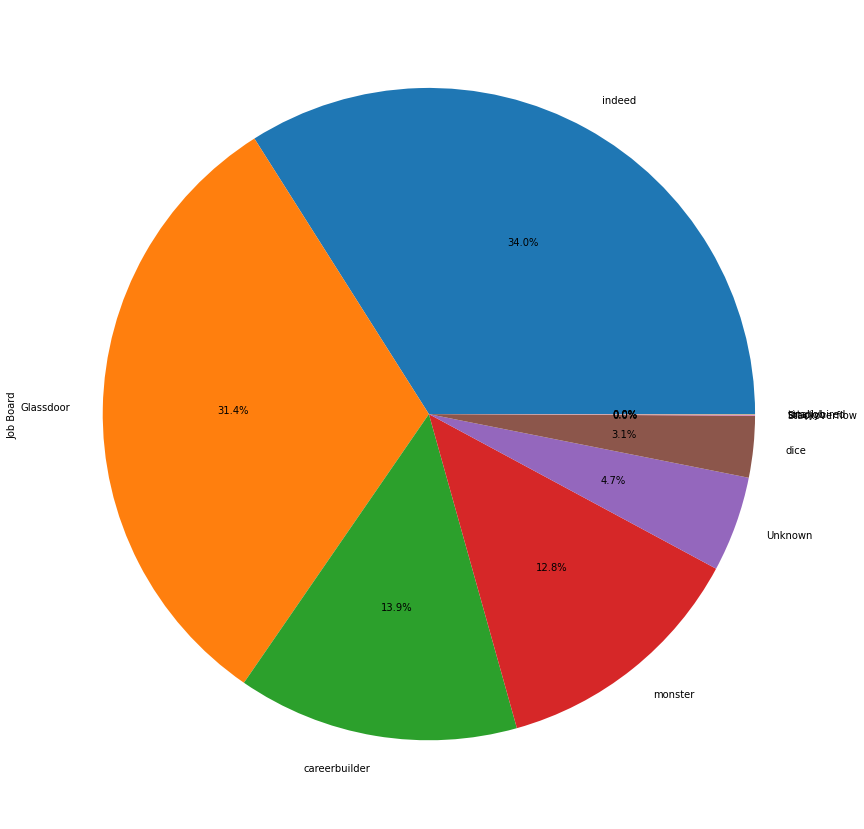

In [72]:

combined_dataset["Job Board"].value_counts().plot(kind='pie',figsize=(15,15),autopct='%1.1f%%')

Indeed and Glassdoor make up a major of this dataset. This will be important later on in testing so we can account for data drift.

We have build a combined dataset that will be used for training.